# Top Movies of the 20th Century
## An understanding of the Movie Industry- Year of Release, Genre,Cast etc.

## Context
The dataset summarizes the top movies from a period of 1920-2000- One of the "Golden Periods" of Hollywood Movies. 
The data can be used to perform an exploratory data analysis on Hollywood filmography- and to identify the pattern how the movie genres have developed over the years. 
Also presents The top cast members- Actors, Actress and Directors and the popularity.

The dataset is prepared by Paramartha Sengupta

Here is the dataset link : https://www.kaggle.com/paramarthasengupta/top-movies-database-19202000s

## Content

<ul>
  <li><a href="#part1">1. Loading Data and Checking Values</a></li>
  <li><a href="#part2">2. Description of Columns</a>
  <li><a href="#part3">3. Data Wrangling</a>
    <ul>
      <li><a href="#part3-1">3.1 Implement the process of sorting year ascendingly</a></li>
      <li><a href="#part3-2">3.2 Define function to show values on both vertical and horizontal bar</a></li>
      <li><a href="#part3-3">3.3 Define function to show all values in the table</a></li>  
      <li><a href="#part3-4">3.4 Define function for merging dataframes </a></li>  
    </ul>
  </li>
  <li><a href="#part4">4. Data Visualization</a>
    <ul>
      <li><a href="#part4-1">4.1 Draw a Correlation Matrix</a></li>
      <li><a href="#part4-2">4.2 Draw a Graph showing the number of movies by year all throughout 20th century</a></li>
      <li><a href="#part4-3">4.3 Draw a Graph showing the number of movies by year and subject all throughout 20th century</a></li>
      <li><a href="#part4-4">4.4 Draw a Graph showing the top 10 actors with most movies acted all throughout 20th century</a></li>
      <li><a href="#part4-5">4.5 Draw a Graph showing the top 10 actress with most movies acted all throughout 20th century</a></li>
      <li><a href="#part4-6">4.6 Draw a Graph showing the top 10 directors with most movies managed all throughout 20th century</a></li>
      <li><a href="#part4-7">4.7 Draw a Graph showing average movie length of movies and average popularity of movies all throughout 20th century</a></li>
      <li><a href="#part4-8">4.8 Draw a Graph showing the most 10 popular movies all throughout 20th century</a></li>
      <li><a href="#part4-9">4.9 Draw a Graph showing the number of movies by award and year all throughout 20th century</a></li>
      <li><a href="#part4-10">4.10 Draw a Graph showing actors or actresses who both have acted and directed all throughout 20th century </a></li>
      <li><a href="#part4-11">4.11 Draw a Graph showing the top 10 acting actors and actresses working together all throughout 20th century</a></li>
      <li><a href="#part4-12">4.12 Draw a Graph showing the 10 top actors,actress and directors with the most appeared by awards all throughout 20th century</a></li>
      <li><a href="#part4-13">4.13 Draw a WorldCloud showing award-wining movies' names all throughout 20th century</a></li>   
    </ul>
  </li>
</ul>

<a id='part1'></a>
## 1. Loading Data and Checking Values

1 - Import libraries I used for visualization

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
import datetime
import matplotlib.cm as mplcm
import random
import matplotlib.colors as mcolors
import requests
import six
import itertools
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import matplotlib.image as mpimg 
%matplotlib inline

sns.set(style="darkgrid")

2 - Define dataframe after loading all values from csv file and assigning them to it

In [121]:
file_location_url = "files/Movie Dataset.csv";

movies20th_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = "ISO-8859-1")

3 - Deterime how many rows and columns are defined in dataframe

In [122]:
row_count = movies20th_df.shape[0]
column_count = movies20th_df.shape[1]

print("Row : {} , Column : {}".format(row_count,column_count))

Row : 1659 , Column : 9


4 - Show first 5 values of dataframe

In [123]:
movies20th_df.head()

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards
0,1990,111.0,Tie Me Up! Tie Me Down!,Comedy,Banderas Antonio,Abril Victoria,Almodóvar Pedro,68.0,No
1,1991,113.0,High Heels,Comedy,Bosé Miguel,Abril Victoria,Almodóvar Pedro,68.0,No
2,1983,104.0,Dead Zone The,Horror,Walken Christopher,Adams Brooke,Cronenberg David,79.0,No
3,1979,122.0,Cuba,Action,Connery Sean,Adams Brooke,Lester Richard,6.0,No
4,1978,94.0,Days of Heaven,Drama,Gere Richard,Adams Brooke,Malick Terrence,14.0,No


5 - Show last 5 values of dataframe

In [124]:
movies20th_df.tail()

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards
1654,1932,226.0,Shadow of the Eagle The,Action,Wayne John,NaN,NaN,19.0,No
1655,1989,103.0,Blood & Guns,Action,Welles Orson,NaN,NaN,43.0,No
1656,1988,78.0,Hot Money,Drama,Welles Orson,NaN,NaN,19.0,No
1657,1977,75.0,Comedy Tonight,Comedy,Williams Robin,NaN,NaN,18.0,No
1658,1991,65.0,Robin Williams,Comedy,Williams Robin,NaN,NaN,4.0,No


6 - Show each column information of dataframe

In [125]:
movies20th_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        1659 non-null   int64  
 1   Length      1592 non-null   float64
 2   Title       1659 non-null   object 
 3   Subject     1657 non-null   object 
 4   Actor       1651 non-null   object 
 5   Actress     1281 non-null   object 
 6   Director    1406 non-null   object 
 7   Popularity  1646 non-null   float64
 8   Awards      1652 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 116.8+ KB


7 - Show how many variables there are in dataframe

In [126]:
movies20th_df.count()

Year          1659
Length        1592
Title         1659
Subject       1657
Actor         1651
Actress       1281
Director      1406
Popularity    1646
Awards        1652
dtype: int64

8 - Show descriptive statistics of dataframe

In [127]:
movies20th_df.describe()

,Year,Length,Popularity
count,1659.000000,1592.000000,1646.000000
mean,1975.802893,105.179648,43.067436
std,17.057848,30.629501,26.751536
min,1920.000000,5.000000,0.000000
25%,1967.000000,90.000000,19.000000
50%,1983.000000,102.000000,43.000000
75%,1989.000000,116.000000,67.000000
max,1997.000000,450.000000,88.000000


9 - Determine if null values of each column are in a dataframe

In [128]:
movies20th_df.isnull().sum()

Year            0
Length         67
Title           0
Subject         2
Actor           8
Actress       378
Director      253
Popularity     13
Awards          7
dtype: int64

<a id='part2'></a>
## 2. Description of Columns

In [129]:
values = [
  ['Year', 
   'Length', 
   'Title',
   'Subject',
   'Actor',
   'Actress',
   'Director',
   'Popularity',
   'Awards'
  ],  #1st col
  ["A year the movie was released", 
   "A length of the movie in minutes",
   "A name of the Movie",  
   "A genre of the Movie",
   "A name of the Lead Male Actor in the Movie",
   "A name of the Lead Female Actor in the Movie",
   "A name of the Movie Director",
   "A metrics to identify the Popularity of the Film",
   "If the film has been nominated/ awarded with Global Recognitions"
  ] #2nd col
] 

layout = go.Layout(title="Description of Columns", 
                   height=500, 
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[go.Table(
  columnwidth = [200,600],
  header = dict(
    values = [['<b>COLUMN NAME</b>'],
              ['<b>DESCRIPTION</b>']
             ],
    line_color='darkslategray',
    fill_color='darkorange',
    align=['left','center'],
    font=dict(color='white', size=12),
    height=40
  ),
  cells=dict(
    values=values,
    line_color='darkslategray',
    fill=dict(color=['orange', 'white']),
    align=['left', 'left'],
    font_size=12,
    height=30)
    )
], layout = layout)
pio.write_image(fig, "images/image1.png")
fig.show()

<a id='part3'></a>
## 3. Data Wrangling

<a id='part3-1'></a>
### 3.1 Implement the process of sorting year ascendingly

In [130]:
movies20th_df = movies20th_df.sort_values(by=['Year'], ascending=True)

<a id='part3-2'></a>
### 3.2 Define function to show values on both vertical and horizontal bar

In [131]:
def show_values_on_bars(axs, h_v="v", space= 0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=18) 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width()
                _y = p.get_y() + p.get_height() - float(space)
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left", fontsize=18)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

<a id='part3-3'></a>
### 3.3 Define function to show all values in the table

In [132]:
def render_mpl_table(data, title = "",col_width=3.0,image_path = "", row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs, cellLoc='center')

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    mpl_table.auto_set_column_width(col=list(range(len(data.columns))))

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.savefig(image_path)        
    return ax

<a id='part3-4'></a>
### 3.4 Define function for merging dataframes 

In [161]:
def mergeDataFrame(df_melt_1,df_melt_2,how,left_on,right_on):
    return pd.merge(df_melt_1, 
                    df_melt_2,  
                    how=how, 
                    left_on=left_on, 
                    right_on = right_on)

<a id='part4'></a>
## 4. Data Visualization

<a id='part4-1'></a>
### 4.1 Draw a Correlation Matrix

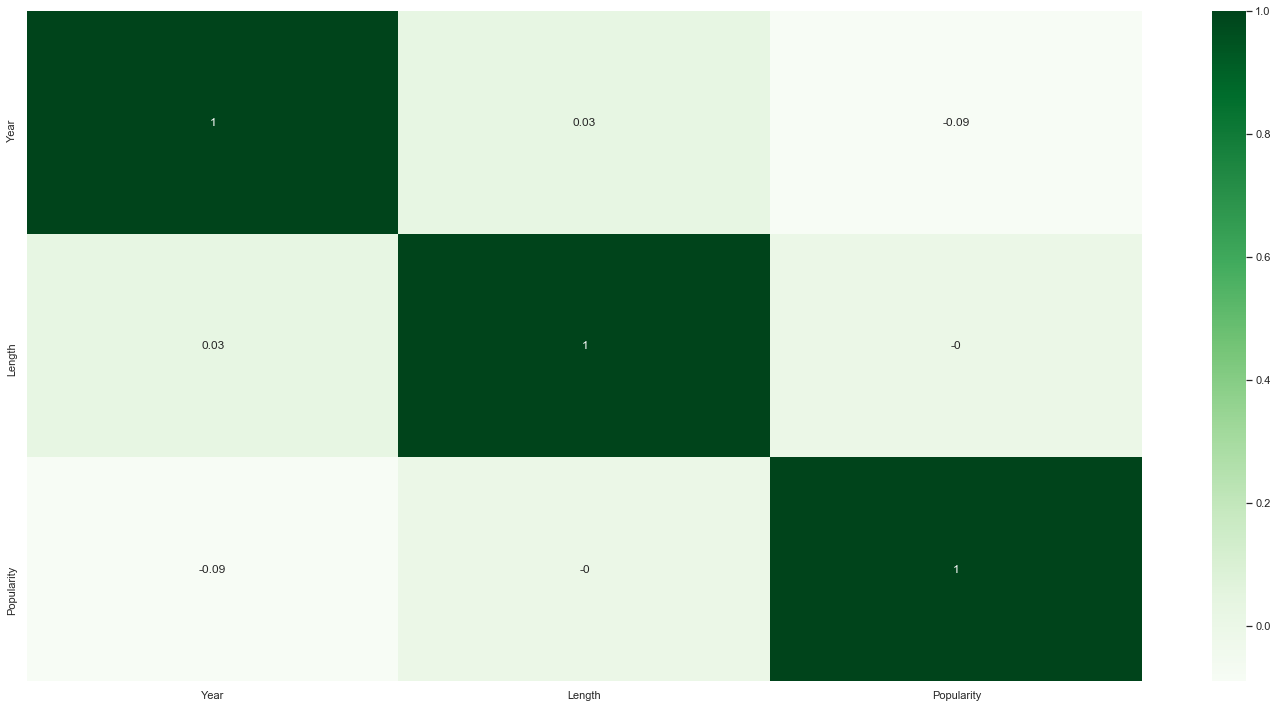

In [133]:
plt.figure(figsize=(20,10))
sns.heatmap(round(movies20th_df.corr(),2), annot=True, cmap='Greens')
plt.tight_layout()
plt.savefig('images/image2.png', bbox_inches = "tight")
plt.show()

<a id='part4-2'></a>
### 4.2 Draw a Graph showing the number of movies by year all throughout 20th century

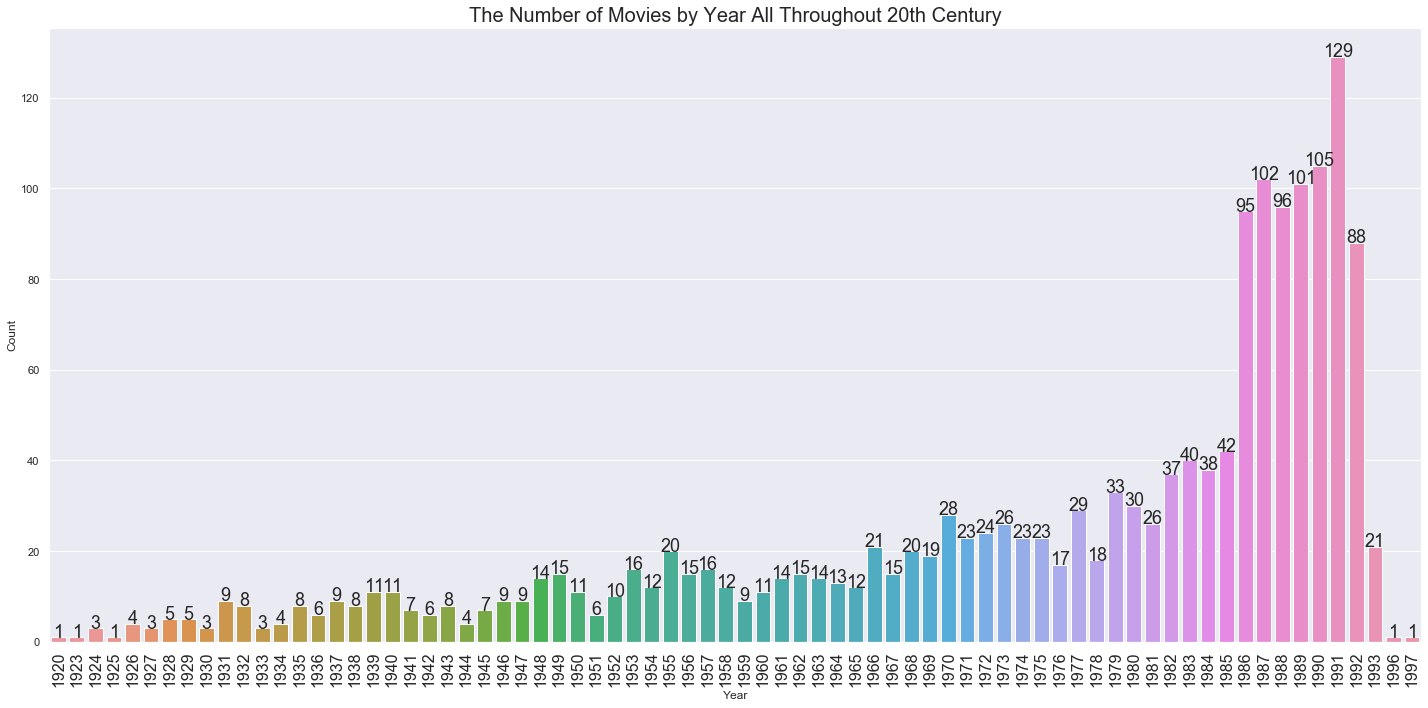

In [134]:
plt.figure(figsize=(20,10))

movies20th_df_count_by_year = movies20th_df.groupby("Year")["Title"].count()
movies20th_df_count_by_year = movies20th_df_count_by_year.reset_index()

movies20th_df_count_by_year = movies20th_df_count_by_year.rename(columns={'Title':'Count'})

graph = sns.barplot(data = movies20th_df_count_by_year, x="Year", y='Count')

show_values_on_bars(graph, "v", 0.3)

plt.xticks(rotation=90, fontsize= 16)
plt.title("The Number of Movies by Year All Throughout 20th Century", fontsize = 20)
plt.savefig('images/image3.png')
plt.tight_layout()
plt.show();

<a id='part4-3'></a>
### 4.3 Draw a Graph showing the number of movies by year and subject all throughout 20th century

In [135]:
movies20th_df_year_subject = movies20th_df.groupby(["Subject", "Year"])["Title"].count()
movies20th_df_year_subject = movies20th_df_year_subject.reset_index(level=[0,1])

movies20th_df_year_subject = movies20th_df_year_subject.rename(columns={'Title':'Count'})

fig = px.bar(movies20th_df_year_subject, 
             x='Year', 
             y='Count', 
             color ='Subject',
             title='The Number of Movies by Year and Subject All Throughout 20th Century',
             color_discrete_sequence=px.colors.qualitative.Alphabet,
             height = 650
            )

pio.write_image(fig, "images/image4.png") 
fig.show()

<a id='part4-4'></a>
### 4.4 Draw a Graph showing the top 10 actors with most movies acted all throughout 20th century

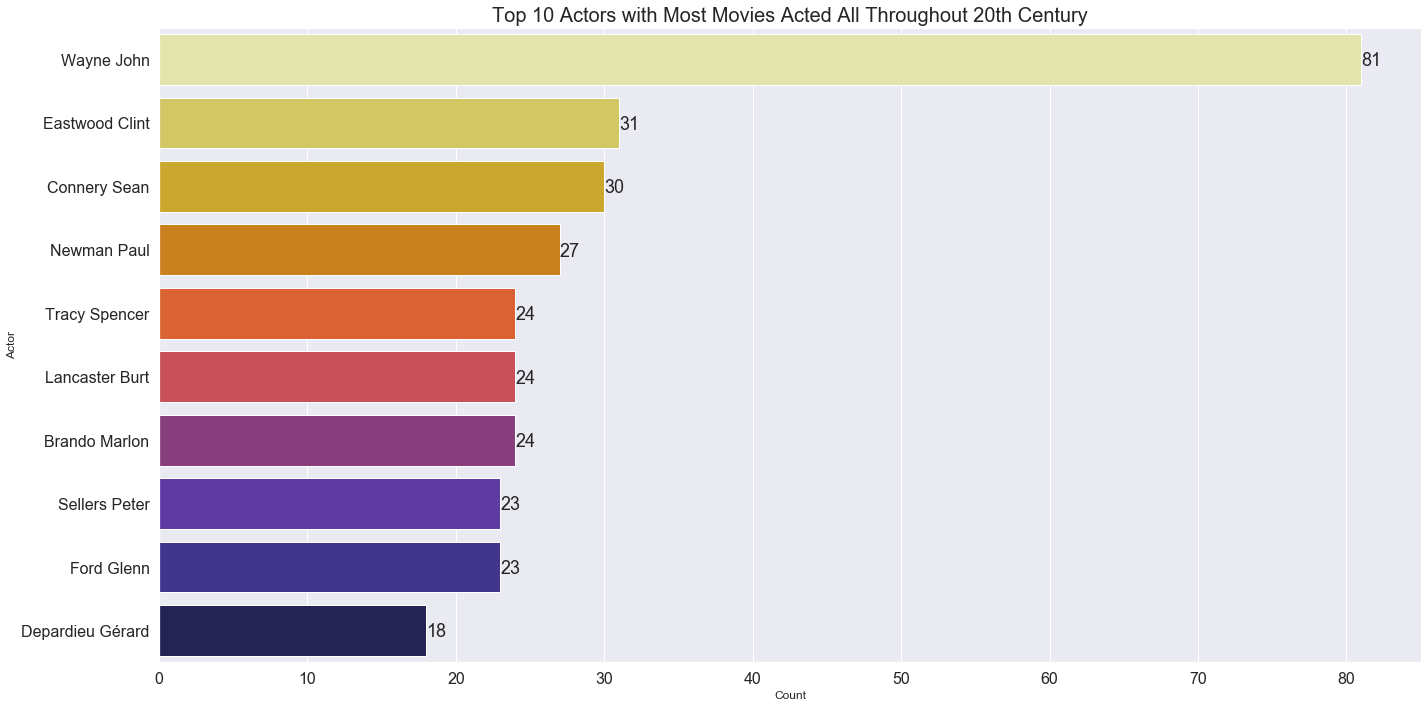

In [136]:
plt.figure(figsize=(20,10))

movies20th_df_actors = pd.DataFrame({'Count' : movies20th_df.groupby(['Actor']).size()}).reset_index()
movies20th_df_actors = movies20th_df_actors.sort_values(['Count'], ascending = False)

movies20th_df_actors_top_10 = movies20th_df_actors.head(10)

graph = sns.barplot(data = movies20th_df_actors_top_10, x="Count", y='Actor',palette="CMRmap_r")

show_values_on_bars(graph, "h", 0.3)

plt.yticks(fontsize= 16)    
plt.xticks(fontsize= 16)
plt.title("Top 10 Actors with Most Movies Acted All Throughout 20th Century", fontsize = 20)
plt.savefig('images/image5.png')
plt.tight_layout()
plt.show();

<a id='part4-5'></a>
### 4.5 Draw a Graph showing the top 10 actress with most movies acted all throughout 20th century

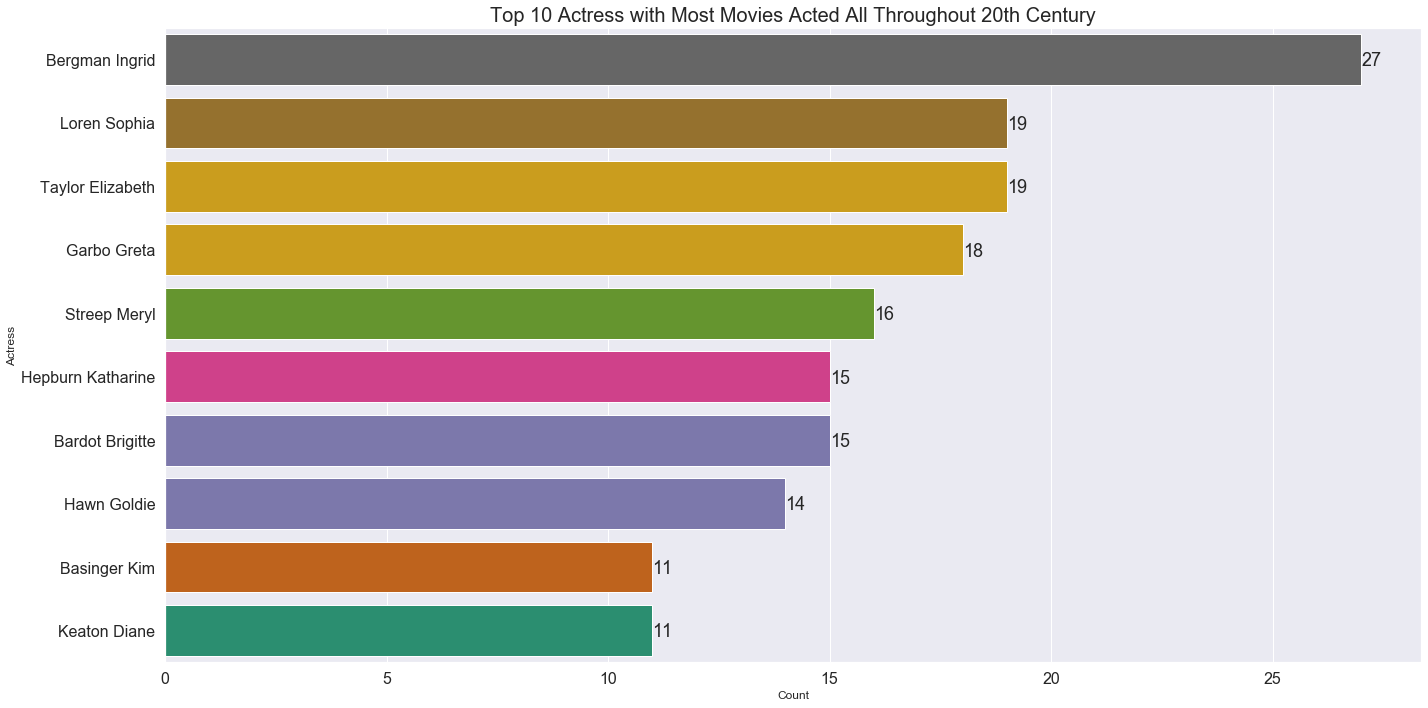

In [137]:
plt.figure(figsize=(20,10))

movies20th_df_actress = pd.DataFrame({'Count' : movies20th_df.groupby(['Actress']).size()}).reset_index()
movies20th_df_actress = movies20th_df_actress.sort_values(['Count'], ascending = False)

movies20th_df_actress_top_10 = movies20th_df_actress.head(10)

graph = sns.barplot(data = movies20th_df_actress_top_10, x="Count", y='Actress',palette="Dark2_r")

show_values_on_bars(graph, "h", 0.3)

plt.yticks(fontsize= 16)    
plt.xticks(fontsize= 16)
plt.title("Top 10 Actress with Most Movies Acted All Throughout 20th Century", fontsize = 20)
plt.savefig('images/image6.png')
plt.tight_layout()
plt.show();

<a id='part4-6'></a>
### 4.6 Draw a Graph showing the top 10 directors with most movies managed all throughout 20th century

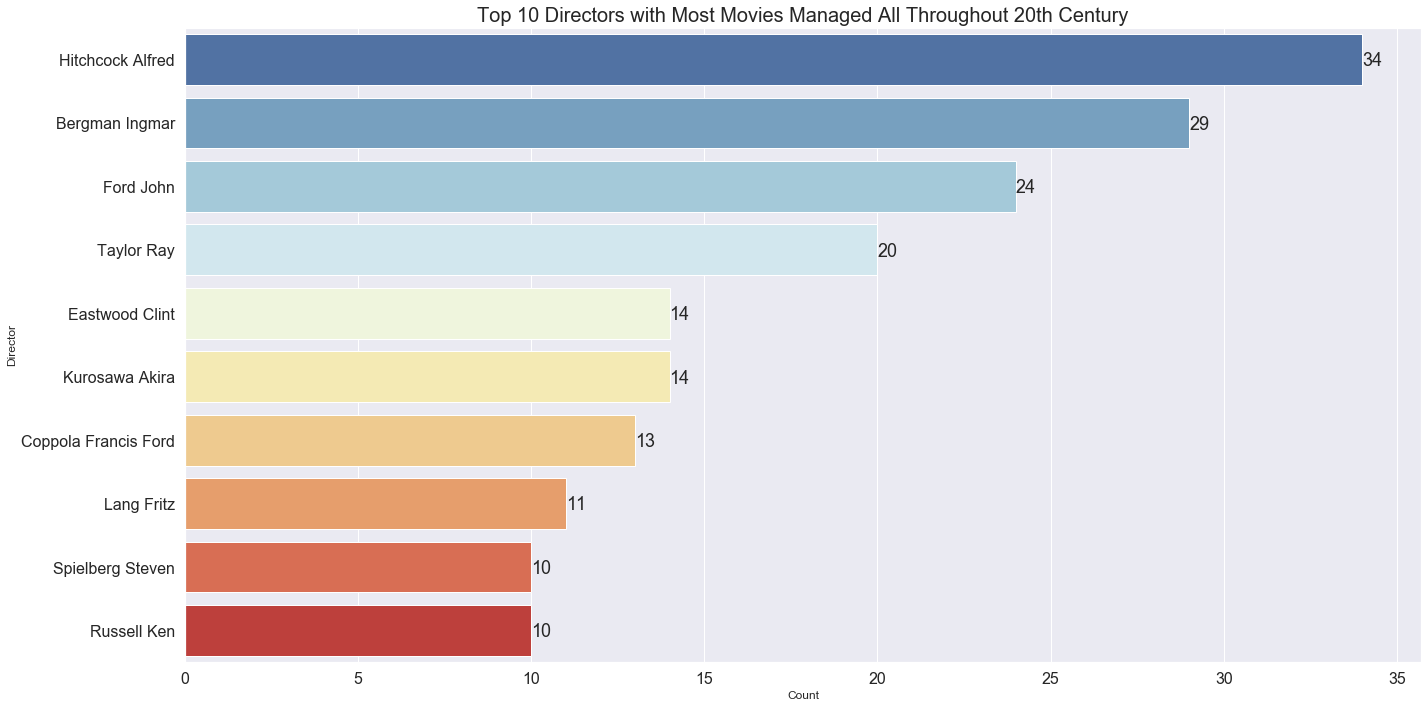

In [138]:
plt.figure(figsize=(20,10))

movies20th_df_director = pd.DataFrame({'Count' : movies20th_df.groupby(['Director']).size()}).reset_index()
movies20th_df_director = movies20th_df_director.sort_values(['Count'], ascending = False)

movies20th_df_director_top_10 = movies20th_df_director.head(10)

graph = sns.barplot(data = movies20th_df_director_top_10, x="Count", y='Director',palette="RdYlBu_r")

show_values_on_bars(graph, "h", 0.3)

plt.yticks(fontsize= 16)    
plt.xticks(fontsize= 16)
plt.title("Top 10 Directors with Most Movies Managed All Throughout 20th Century", fontsize = 20)
plt.savefig('images/image7.png')
plt.tight_layout()
plt.show();

<a id='part4-7'></a>
### 4.7 Draw a Graph showing average movie length of movies and average popularity of movies all throughout 20th century

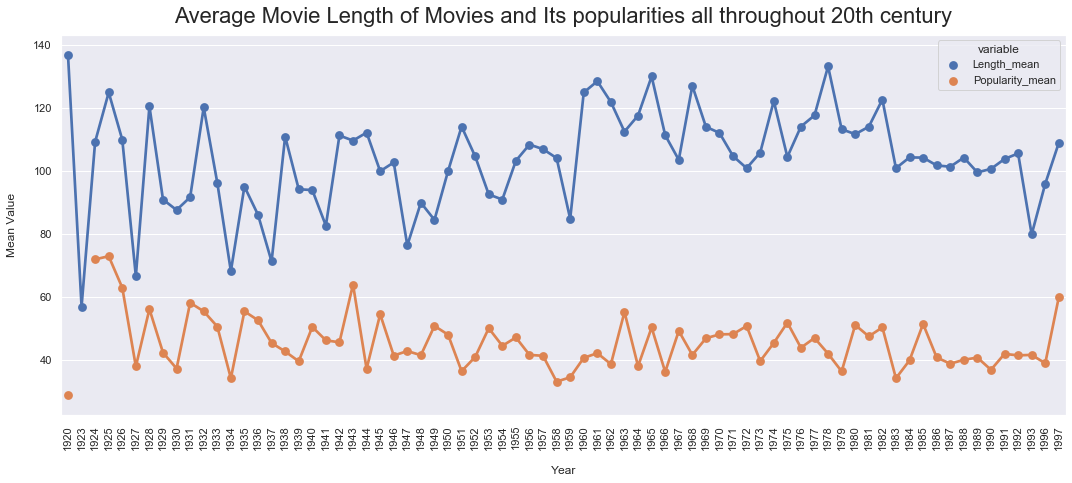

In [139]:
plt.figure(figsize=(18,7))

movies20th_df_graph = movies20th_df.groupby('Year').agg({'Length': ['mean'],"Popularity": ['mean']}).reset_index()
movies20th_df_graph.columns = ["_".join(x) for x in movies20th_df_graph.columns.ravel()]

movies20th_df_graph = movies20th_df_graph.melt("Year_", ["Length_mean","Popularity_mean"])
ax = sns.pointplot(data = movies20th_df_graph, x='Year_', y='value', hue="variable")

plt.title('Average Movie Length of Movies and Its popularities all throughout 20th century', fontsize=22, y=1.015)
plt.xlabel('Year', labelpad=16)
plt.ylabel('Mean Value', labelpad=16)
plt.xticks(rotation= 90)
plt.savefig('images/image8.png')

<a id='part4-8'></a>
### 4.8 Draw a Graph showing the most 10 popular movies all throughout 20th century

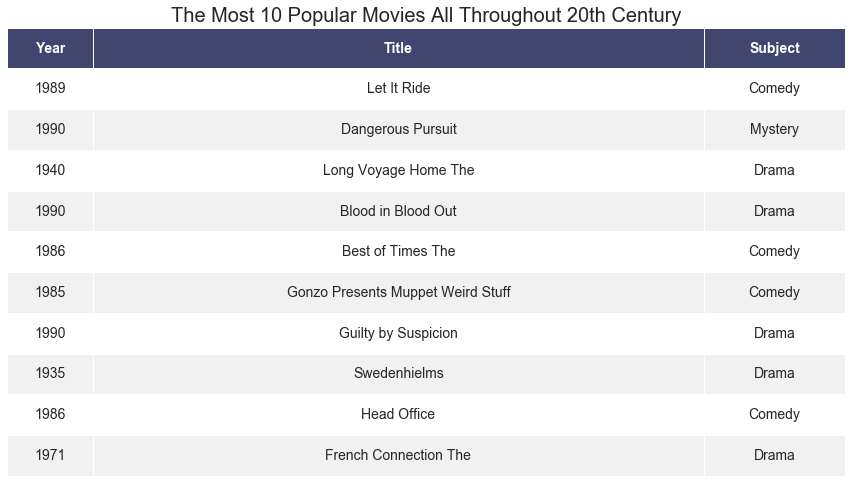

In [140]:
movies20th_df_top = movies20th_df.sort_values(by='Popularity',ascending=False)
movies20th_df_top = movies20th_df_top[:10]

movies20th_df_top = movies20th_df_top.loc[:,['Year','Title','Subject']]
render_mpl_table(movies20th_df_top,
                 title = "The Most 10 Popular Movies All Throughout 20th Century",
                 header_columns=0,
                 col_width=4.0,
                 image_path = 'images/image9.png')

<a id='part4-9'></a>
### 4.9 Draw a Graph showing the number of movies by award and year all throughout 20th century

In [141]:
movies20th_df_year_award = movies20th_df.groupby(["Year","Awards"])["Title"].count()
movies20th_df_year_award = movies20th_df_year_award.reset_index(level=[0,1])

movies20th_df_year_award = movies20th_df_year_award.rename(columns={'Title':'Count'})

fig = px.scatter(movies20th_df_year_award, 
             x='Year', 
             y='Count', 
             color='Awards',    
             title='The Number of Movies by Award and Year All Throughout 20th Century',
             height = 650
            )

pio.write_image(fig, "images/image10.png") 
fig.show()

<a id='part4-10'></a>
### 4.10 Draw a Graph showing actors or actresses who both have acted and directed all throughout 20th century 

In [179]:
movies20th_df_actor = movies20th_df.groupby(["Actor"])["Title"].count()
movies20th_df_actor = movies20th_df_actor.reset_index()
movies20th_df_actor = movies20th_df_actor.rename(columns={'Title':'Count'})
movies20th_df_actor.columns=['Cast','Count']

movies20th_df_actress = movies20th_df.groupby(["Actress"])["Title"].count()
movies20th_df_actress = movies20th_df_actress.reset_index()
movies20th_df_actress = movies20th_df_actress.rename(columns={'Title':'Count'})
movies20th_df_actress.columns=['Cast','Count']

cast_df =pd.concat([movies20th_df_actor,movies20th_df_actress])

movies20th_df_director = movies20th_df.groupby(["Director"])["Title"].count()
movies20th_df_director = movies20th_df_director.reset_index()
movies20th_df_director = movies20th_df_director.rename(columns={'Title':'Count'})
movies20th_df_director.columns=['Cast','Count']

cast_df = mergeDataFrame(cast_df, 
                    movies20th_df_director,  
                    'inner', 
                    ['Cast'], 
                    ['Cast'])

cast_df = cast_df.rename(columns={'Count_x':'Movie_Count',"Count_y": "Directed_Count"})
cast_df["Total_Count"] = cast_df["Movie_Count"] + cast_df["Directed_Count"]

fig = px.scatter(cast_df, 
             x='Movie_Count', 
             y='Directed_Count', 
             color='Total_Count',
             hover_data=['Cast'],    
             title='Actors and Actresses who both have acted and directed All Throughout 20th century',
             height = 650
            )

pio.write_image(fig, "images/image11.png") 
fig.show()

<a id='part4-11'></a>
### 4.11 Draw a Graph showing the top 10 acting actors and actresses working together all throughout 20th century

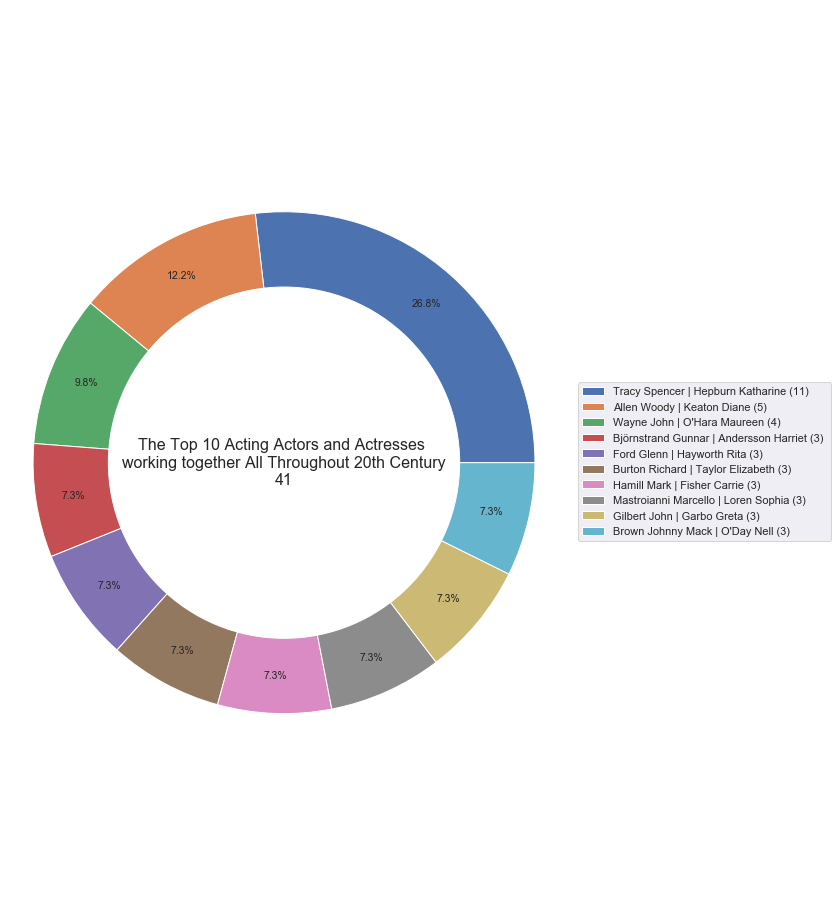

In [143]:
movies20th_df["Cast"] = movies20th_df["Actor"] + " | " + movies20th_df["Actress"]
movies20th_df_top = movies20th_df.copy()
movies20th_df.drop("Cast", axis =1, inplace = True)

movies20th_df_top = movies20th_df_top.groupby(["Cast"])["Title"].count()
movies20th_df_top = movies20th_df_top.reset_index()

movies20th_df_top = movies20th_df_top.rename(columns={'Title':'Count'})
movies20th_df_top = movies20th_df_top.sort_values(by = "Count", ascending=False)
movies20th_df_top = movies20th_df_top[:10]
movies20th_df_top.reset_index(drop=True, inplace=True)


plt.figure(figsize=(13,13))
ax = subplot_kw=dict(aspect="equal")
my_circle = plt.Circle((0, 0), 0.7, color='white')

labels = [movies20th_df_top['Cast'][i] +" (" + str(movies20th_df_top['Count'][i]) +") "  for i in range(movies20th_df_top.shape[0])]

d = plt.pie(movies20th_df_top['Count'],
            autopct='%1.1f%%',
            pctdistance=0.85, 
            labeldistance=1.1,
            textprops = {'fontsize':10.5})

plt.axis('equal')
plt.gca().add_artist(my_circle)

plt.legend(labels,loc='right',bbox_to_anchor=[1.5, 0.5])
plt.text(0, 
         0, 
         "The Top 10 Acting Actors and Actresses \nworking together All Throughout 20th Century\n" + str(movies20th_df_top['Count'].sum()),
         horizontalalignment='center',
         verticalalignment='center',
         size=16,
        )
plt.savefig('images/image12.png',bbox_inches = "tight")  
plt.tight_layout()
plt.show()

<a id='part4-12'></a>
### 4.12 Draw a Graph showing the 10 top actors,actress and directors with the most appeared by awards all throughout 20th century

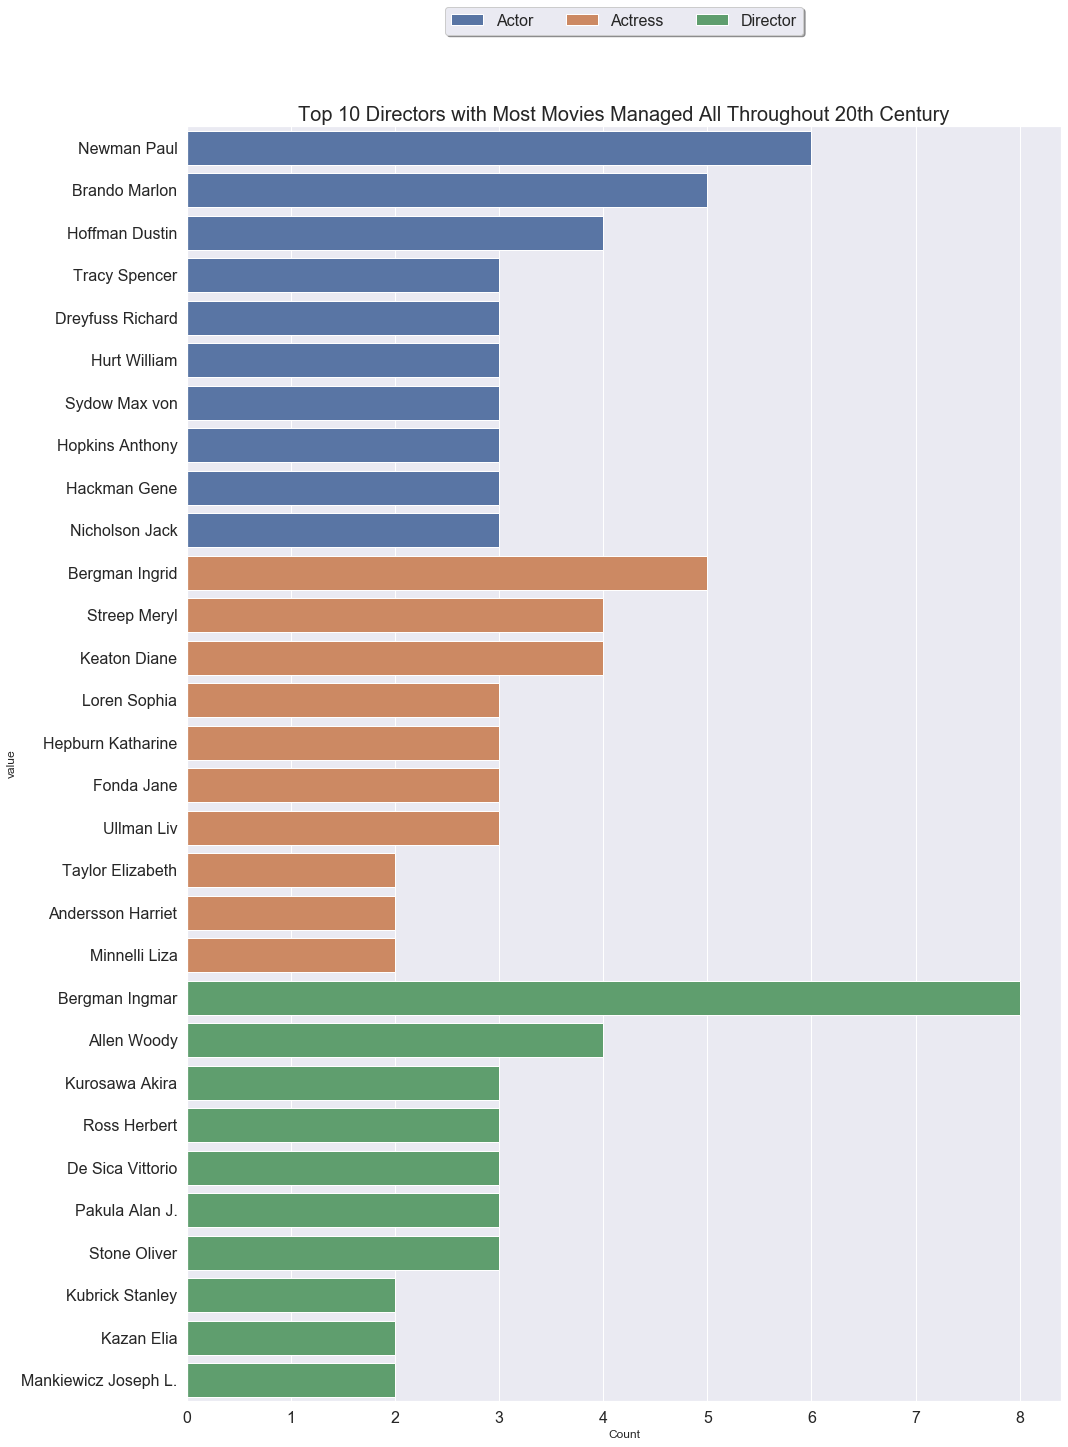

In [144]:
movies20th_df_actor = movies20th_df.groupby('Actor')['Awards'].apply(lambda x: (x=='Yes').sum()).reset_index(name='Count')
movies20th_df_actress = movies20th_df.groupby('Actress')['Awards'].apply(lambda x: (x=='Yes').sum()).reset_index(name='Count')
movies20th_df_director = movies20th_df.groupby('Director')['Awards'].apply(lambda x: (x=='Yes').sum()).reset_index(name='Count')

movies20th_df_actor.sort_values(by="Count",ascending=False,inplace=True)
movies20th_df_actress.sort_values(by="Count",ascending=False,inplace=True)
movies20th_df_director.sort_values(by="Count",ascending=False,inplace=True)

movies20th_df_actor = movies20th_df_actor[:10]
movies20th_df_actress = movies20th_df_actress[:10]
movies20th_df_director = movies20th_df_director[:10]

top_award=pd.concat([movies20th_df_actor,movies20th_df_actress,movies20th_df_director])


movies20th_df_awards = top_award.melt("Count", ["Actor","Actress","Director"])
movies20th_df_awards.dropna(inplace=True)
movies20th_df_awards.reset_index(drop=True, inplace=True)

plt.figure(figsize=(15,20))
ax = sns.barplot(data = movies20th_df_awards, x="Count", y="value", hue="variable", dodge=False)

      
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=True, prop={'size': 16})


plt.yticks(fontsize= 16)    
plt.xticks(fontsize= 16)
plt.title("10 Top Actors,Actress and Directors with the Most Appeared by Awards All Throughout 20th Century", fontsize = 20)
plt.savefig('images/image13.png',bbox_inches = "tight")  
plt.tight_layout()
plt.show()

<a id='part4-13'></a>
### 4.13 Draw a WorldCloud showing award-wining movies' names all throughout 20th century 

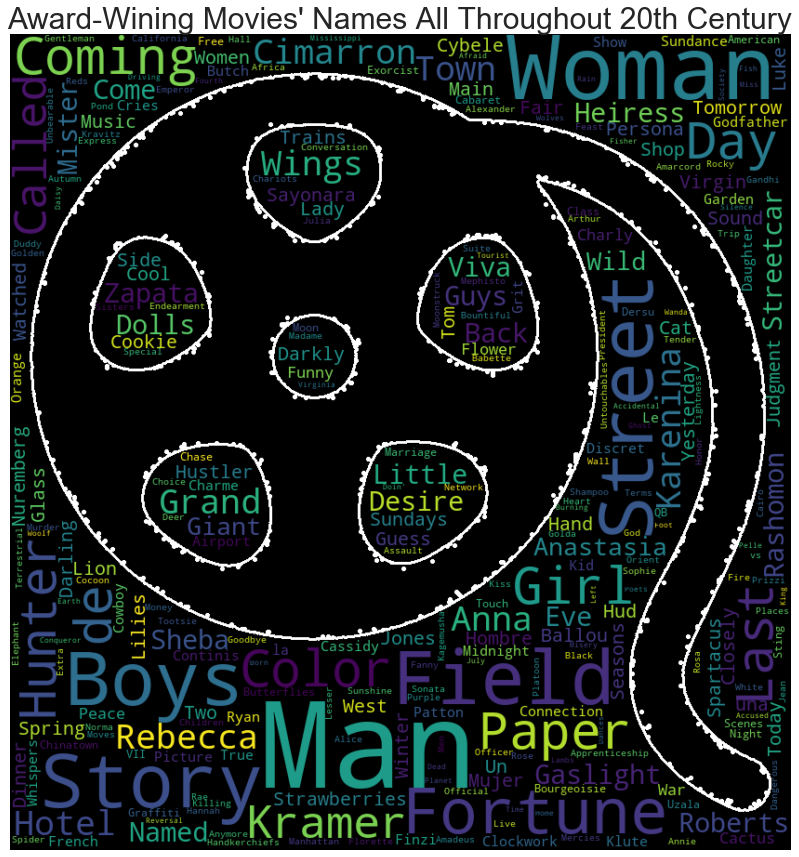

In [145]:
plt.figure(figsize=[15, 15])

image = Image.open("images/movie_black_white_image.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)

movies20th_df_winning_movies = movies20th_df[movies20th_df["Awards"] == "Yes"]

wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black', 
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='white',
                    ).generate(' '.join(movies20th_df_winning_movies['Title']))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Award-Wining Movies' Names All Throughout 20th Century", fontsize=30)
plt.savefig('images/image14.png')
plt.show()